Welcome to JupyROOT 6.30/02


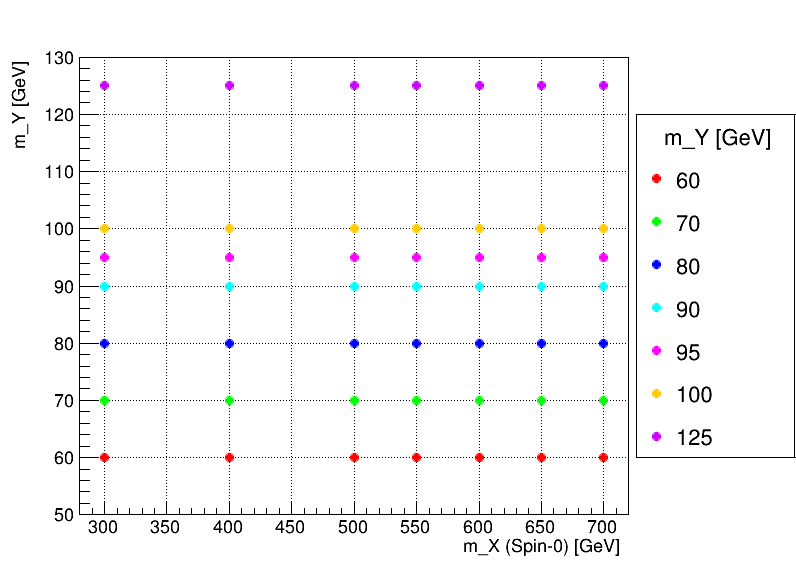

In [1]:
import ROOT
from array import array

# Grid points
mX = [300, 400, 500, 550, 600, 650, 700]
mY = [60, 70, 80, 90, 95, 100, 125]

# Colors for each mY value (added an extra color)
colors = [ROOT.kRed, ROOT.kGreen, ROOT.kBlue, ROOT.kCyan, ROOT.kMagenta, ROOT.kOrange, ROOT.kViolet]
color_map = dict(zip(mY, colors))

# Canvas
canvas = ROOT.TCanvas("canvas", "Scatter plot of mX vs mY grid points", 800, 600)
canvas.SetGrid()

# Multigraph
mg = ROOT.TMultiGraph()

graphs = {}

for y in mY:
    x_points = array('d', mX)
    y_points = array('d', [y] * len(mX))
    graph = ROOT.TGraph(len(x_points), x_points, y_points)
    graph.SetMarkerStyle(20)
    graph.SetMarkerColor(color_map[y])  # Ensure no KeyError
    mg.Add(graph)
    graphs[y] = graph  # Store the graph for the legend

canvas.SetRightMargin(0.21)

mg.Draw("AP")
mg.GetXaxis().SetTitle("m_X (Spin-0) [GeV]")
mg.GetYaxis().SetTitle("m_Y [GeV]")
mg.GetYaxis().SetRangeUser(50, 130)  # Adjusted Y-axis to include 125

legend = ROOT.TLegend(0.8, 0.2, 1.0, 0.8)  # Adjusted position to be outside

legend.SetHeader("m_Y [GeV]", "C")

for y in mY:
    legend.AddEntry(graphs[y], str(y), "p")

legend.Draw()

canvas.Update()
canvas.Draw()
